In [44]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [20]:
df = pd.read_csv('aug_train.csv',usecols=['city_development_index','training_hours','target'])

In [11]:
df

,city_development_index,training_hours,target
0,0.920,36,1.0
1,0.776,47,0.0
2,0.624,83,0.0
3,0.789,52,1.0
4,0.767,8,0.0
...,...,...,...
19153,0.878,42,1.0
19154,0.920,52,1.0
19155,0.920,44,0.0
19156,0.802,97,0.0


In [12]:
df.isnull().sum()

city_development_index    0
training_hours            0
target                    0
dtype: int64

In [13]:
x = df.iloc[ : , 0 : 2]
y = df.iloc[ : , -1]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_12132\3159469985.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['city_development_index'])


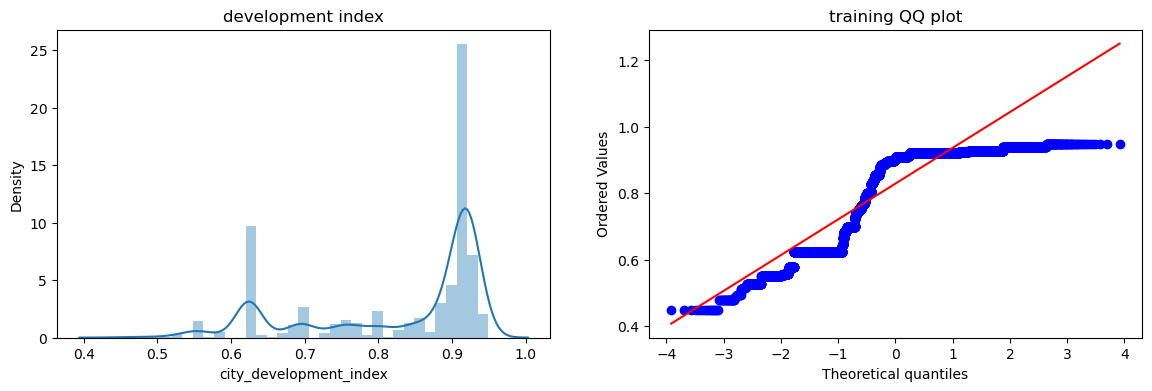

In [16]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
sns.distplot(X_train['city_development_index'])
plt.title('development index')

plt.subplot(122)
stats.probplot(X_train['city_development_index'], dist = 'norm', plot = plt)
plt.title('training QQ plot')

plt.show()

C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_12132\1855453964.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['training_hours'])


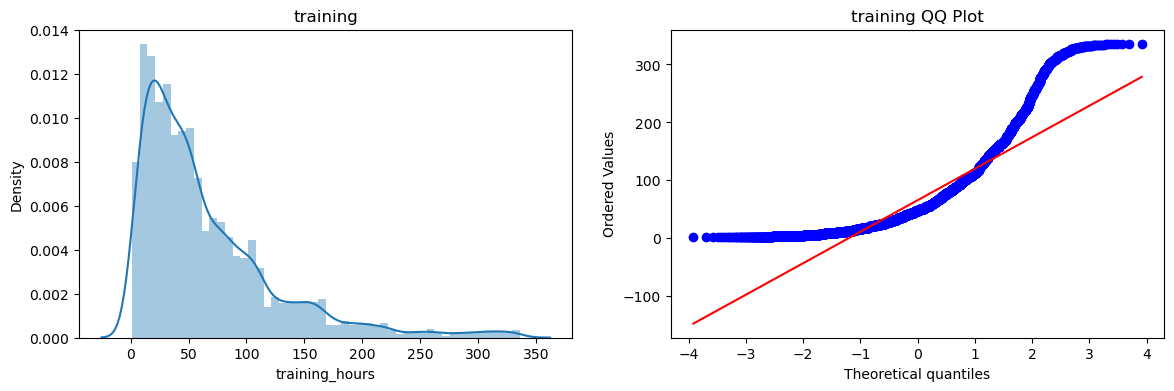

In [18]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.distplot(X_train['training_hours'])
plt.title('training')

plt.subplot(122)
stats.probplot(X_train['training_hours'], dist='norm', plot=plt)
plt.title('training QQ Plot')
plt.show()

In [23]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [24]:
clf.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
Y_pred1 = clf.predict(X_test)

In [28]:
LR = accuracy_score(Y_test,Y_pred)

In [29]:
DT = accuracy_score(Y_test,Y_pred1)

In [31]:
LR

0.769572025052192

In [32]:
DT

0.769572025052192

In [33]:
trf = FunctionTransformer(func = np.log1p)

In [34]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [40]:
clf3 = LogisticRegression()
clf4 = DecisionTreeClassifier()

clf3.fit(X_train_transformed, Y_train)
clf4.fit(X_train_transformed, Y_train)

y_pred3 = clf.predict(X_test_transformed)
y_pred4 = clf2.predict(X_test_transformed)

LR3 = accuracy_score(Y_test, Y_pred)
DT4 = accuracy_score(Y_test, Y_pred)

In [41]:
LR3

0.769572025052192

In [42]:
DT4

0.769572025052192

In [46]:
X_transformed = trf.fit_transform(x)

clf6 = LogisticRegression()
clf7 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf6,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf7,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.758377712488485
DT 0.7408401423766877


C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_12132\3159469985.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['city_development_index'])


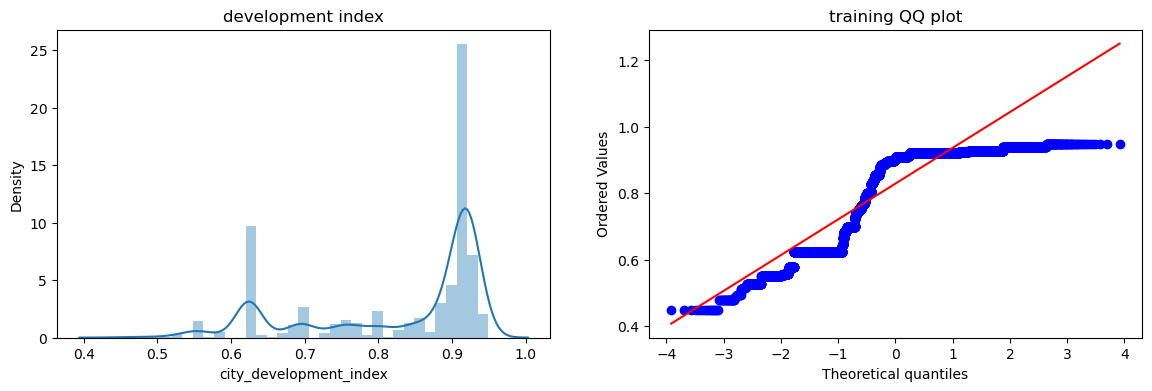

In [47]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
sns.distplot(X_train['city_development_index'])
plt.title('development index')

plt.subplot(122)
stats.probplot(X_train['city_development_index'], dist = 'norm', plot = plt)
plt.title('training QQ plot')

plt.show()

C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_12132\1855453964.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['training_hours'])


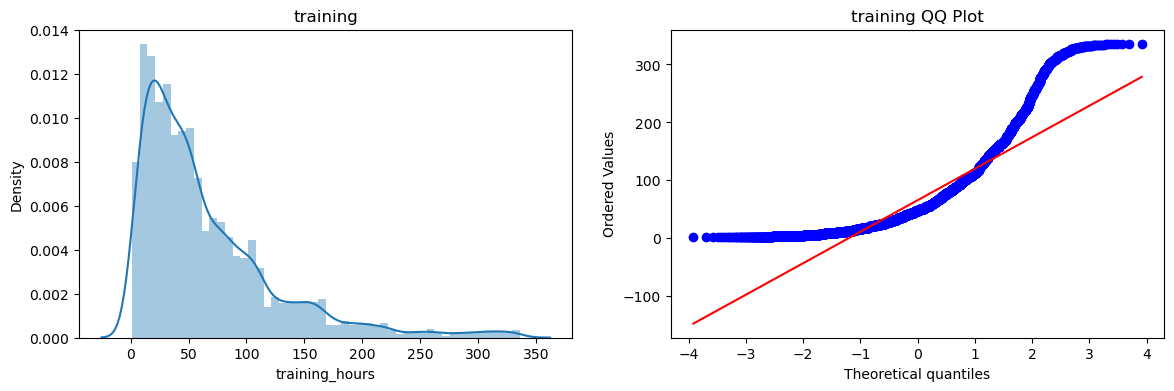

In [48]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.distplot(X_train['training_hours'])
plt.title('training')

plt.subplot(122)
stats.probplot(X_train['training_hours'], dist='norm', plot=plt)
plt.title('training QQ Plot')
plt.show()

In [49]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['training_hours'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [52]:
clf8 = LogisticRegression()
clf9 = DecisionTreeClassifier()

clf8.fit(X_train_transformed2,Y_train)
clf9.fit(X_train_transformed2,Y_train)
    
y_pred8 = clf.predict(X_test_transformed2)
y_pred9 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(Y_test,y_pred8))
print("Accuracy DT",accuracy_score(Y_test,y_pred9))

Accuracy LR 0.7515657620041754
Accuracy DT 0.7518267223382046


C:\Users\Nadim Ansari\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Nadim Ansari\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [53]:
X_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.7646411420659882
DT 0.7406313741094643
